In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

In [2]:
# Load data
file_path = 'train/'
data_lst = []
for filename in os.listdir(file_path):
    if 'dog' not in filename and 'cat' not in filename:
        continue
    real_file_path = file_path + filename
    img = Image.open(real_file_path)
    img = img.resize((64, 64))
    data = np.array(img)
    data = data.reshape(64*64*3, 1)
    if 'cat' in filename:
        data_lst.append((data, 1, img))
    elif 'dog' in filename:
        data_lst.append((data, 0, img))

In [3]:
X_lst = list(data_lst[i][0] for i in range(len(data_lst)))
Y_lst = list(data_lst[i][1] for i in range(len(data_lst)))
img_lst = list(data_lst[i][2] for i in range(len(data_lst)))

In [4]:
# Convert Python list to numpy array
X = np.array(X_lst)
Y = np.array(Y_lst)

In [5]:
# Convert to array with correct dimensions
X = X.reshape(X.shape[0], X.shape[1])
Y = Y.reshape(Y.shape[0], 1)
X = X.T
Y = Y.T
print('X.shape:', X.shape)
print('Y.shaoe:', Y.shape)

X.shape: (12288, 1002)
Y.shaoe: (1, 1002)


In [6]:
# Normalization
min_X = np.min(X)
max_X = np.max(X)
X = (X - min_X)/(max_X - min_X)

In [7]:
# Initializing parameters of a 2-layer neural network
np.random.seed(0)
N0, m = X.shape
N1 = 10
N2 = 1
W1 = np.random.rand(N0, N1) - 0.5
B1 = np.random.rand(N1, 1) - 0.5
W2 = np.random.rand(N1, N2) - 0.5
B2 = np.random.rand(N2, 1) - 0.5

In [8]:
# You should see 32.838553644951105
print(np.sum(W1))

32.838553644951105


In [9]:
# You should see -0.4229774016622794
print(np.sum(B1))

-1.0433989293244808


In [10]:
# You should see -1.0433989293244808
print(np.sum(W2))

-0.4229774016622794


In [11]:
# You should see -0.4841141325352224
print(np.sum(B2))

-0.4841141325352224


In [12]:
#################### Training ####################
alpha = 0.02
cost_history = []
for epoch in range(6000):
    
    # Forward Pass
    K1 = np.dot(W1.T, X) + B1
    A1 = np.maximum(0, K1)
    K2 = np.dot(W2.T, A1) + B2
    A2 = np.maximum(0, K2)
    H = 1 / (1 + np.exp(-K2))
    L = -(Y*np.log(H)+(1-Y)*np.log(1-H))
    J = (1/m)*np.sum(L)
    
    if epoch % 200 == 0:
        cost_history.append(J)
        print('Cost:', J)
    
    # Backward Pass
    dK2 = (1/m)*np.sum(H-Y, axis=0, keepdims = True)
    dW2 = np.dot(A1, dK2.T)
    dB2 = np.sum(dK2, axis=1, keepdims = True)
    dA1 = np.dot(W2, dK2)
    dK1 = dA1 * np.where(K1>0, 1, 0)
    dW1 = np.dot(X, dK1.T)
    dB1 = np.sum(dK1, axis=1, keepdims=True)
    
    # Updates 
    W2 -= alpha * dW2
    B2 -= alpha * dB2
    W1 -= alpha * dW1
    B1 -= alpha * dB1
    

Cost: 4.424046966453417
Cost: 0.6908601205836481
Cost: 0.6863672890425341
Cost: 0.6816175716972489
Cost: 0.6772474738818115
Cost: 0.671555755923637
Cost: 0.6652841749066093
Cost: 0.6590535794515534
Cost: 0.6522672256922352
Cost: 0.6446412773036614
Cost: 0.6368039035337787
Cost: 0.6293621559218476
Cost: 0.6220930415504082
Cost: 0.6143945178372001
Cost: 0.6065124007026886
Cost: 0.5987444409791776
Cost: 0.5909666142346334
Cost: 0.5830701752594613
Cost: 0.5749493645636091
Cost: 0.5668938188793071
Cost: 0.5588571792301286
Cost: 0.5506135683340724
Cost: 0.5422732341136138
Cost: 0.5339135381973625
Cost: 0.5255655204534159
Cost: 0.5171064036261142
Cost: 0.508136586991663
Cost: 0.499358649289001
Cost: 0.4905035289585374
Cost: 0.481821243962513


Text(0.5, 1.0, 'Costs over iterations')

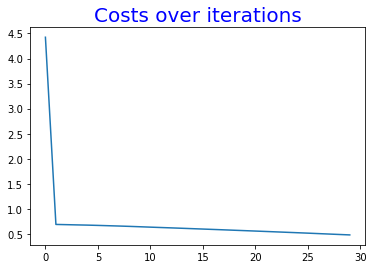

In [13]:
plot_x = list(range(len(cost_history)))
plot_y = cost_history
plt.plot(plot_x, plot_y)
plt.title("Costs over iterations", color = 'blue', fontdict = {'fontsize': 20})

In [14]:
count = 0
K1 = np.dot(W1.T, X) + B1
A1 = np.maximum(0, K1)
K2 = np.dot(W2.T, A1) + B2
A2 = 1 / (1+np.exp(-K2))
print(A2)
wrong_result = []
for i in range(Y.shape[1]):
    y = 0 if A2[0][i] < 0.5  else 1
    if y == Y[0][i]:
        count += 1
    else:
        wrong_result.append(i)
print('Training Accuracy:', count/Y.shape[1])
print(Y)

[[0.52976428 0.42563201 0.86959903 ... 0.49951463 0.36877647 0.3989423 ]]
Training Accuracy: 0.7395209580838323
[[1 0 0 ... 0 0 0]]


In [15]:
#################### Testing #################### 

In [16]:
file_path = 'test/'
num_data = 0
correct = 0
X_test = []
Y_test = []
for filename in os.listdir(file_path):
    if 'cat' not in filename and 'dog' not in filename:
        continue
    real_file_path = file_path+filename
    img = Image.open(real_file_path)
    img = img.resize((64, 64))
    arr = np.array(img)
    arr = arr.reshape(64*64*3, 1)
    arr = arr / 255
    X_test.append(arr)
    if 'cat' in filename:
        Y_test.append(1)
    else:
        Y_test.append(0)

In [17]:
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

Y_test = Y_test.reshape(1, 100)
print('Y_test.shape:', Y_test.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
X_test = X_test.T
print('X_test.shape:',X_test.shape)

Y_test.shape: (1, 100)
X_test.shape: (12288, 100)


In [18]:
Z1 = np.dot(W1.T, X) + B1
A1 = np.maximum(0, Z1)
Z2 = np.dot(W2.T, A1) + B2
H_test = 1/(1+np.exp(-Z2))
num_data = 100
correct = 0
for i in range(100):
    y_predict = 1 if H_test[0][i] < 0.5 else 0
    if y_predict == Y_test[0][i]:
        correct += 1

In [19]:
print('Number of data:', num_data)
print('Accuracy:', correct/num_data)

Number of data: 100
Accuracy: 0.55
